# AMGeO API Release

<img src='./static/AMGeOLogo.svg'/>

Welcome to the AMGeO API release notebook, going over the API and how to use it.

Please see the README on the [repository](https://github.com/AMGeO-Collaboration/AMGeO-API-Release) for how to run this notebook

### Special thanks to all of our data providers!

- [SuperMAG](https://supermag.jhuapl.edu/)
- [SuperDARN](http://vt.superdarn.org/tiki-index.php)
- [AMPERE](http://ampere.jhuapl.edu/)
- [NASA SPDF](https://spdf.gsfc.nasa.gov/)

# AMGeO's new API

## Importing the API

To import AMGeO's Python API, execute the below. 

<mark>NOTE:</mark> upon import, if you have not configured AMGeO with your API key, SuperMAG username or AMPERE username, this will be asked here (with instructions on how to get each).

In [1]:
from AMGeO.api import AMGeOApi

Solar wind data files will be saved to /Users/willemmirkovich/Library/Application Support/nasaomnireader

------------IMPORTANT----------------------------
Unable to import spacepy. Will fall back to
using Omni text files, which may have slightly
different data and incomplete metadata
-------------------------------------------------



## Creating an AMGeO API instance

Here, we can create an AMGeO API instance, and get various details as to a default API instance

In [2]:
api = AMGeOApi()
api

AMGeO API instance
current configuration: default
current output directory: /Users/willemmirkovich/AMGeO/AMGeO-API-Release/amgeo_out

### Setting our output directory for AMGeO data

When running AMGeO, a local file system directory will be selected to store your assimilative maps. By default, AMGeo will use ```~/amgeo_v2_ouptput```

In [3]:
api.get_output_dir()

'/Users/willemmirkovich/AMGeO/AMGeO-API-Release/amgeo_out'

But, if you want to specify another directory, you can set this in the API instance using ```set_output_dir```

In [4]:
api.set_output_dir('./amgeo_out')

In [5]:
api.get_output_dir()

'/Users/willemmirkovich/AMGeO/AMGeO-API-Release/amgeo_out'

# Creating assimilative maps using AMGeO's new API

Now that we have an AMGeO API instance, we can start creating new assimilative map data!

## Creating an AMGeO Controller

To generate assimilative maps, you will have to load specific settings from AMGeO. Conveniently, AMGeO's new API allows for a simple way to load AMGeO's default settings using a ```controller```.

To create a ```controller``` instance, you can call ```get_controller``` on an API instance

In [6]:
controller = api.get_controller()
controller

Default AMGeO Controller
Creates Assimilative Maps using SuperMAG and SuperDARN observations
Does not predict magnetic potential nor field-aligned current

As observerd, calling ```get_controller``` returns an ```Default AMGeO Controller```, that is able to both create and load assimilative maps using AMGeO's default settings. 

## Generating AMGeO maps

<img src="./static/AMGeOElectricPotentialMap.png" width="500px" height="500px">

Now that we have a ```controller``` instance, we can create assimilative maps by calling the ```generate``` method on our ```controller```. This method takes both a hemisphere and a date argument. For example, if we wanted to generate maps for dates:

- January 6th, 2013 12:30:00
- January 6th, 2013 13:30:00
- February 6th, 2013 12:30:00
- February 6th, 2013 13:30:00

and on the Northern hemisphere, we can call ```generate``` with ...

In [7]:
# datetime module is used for passing dates/datetimes
from datetime import datetime, date

In [8]:
dts = [
    datetime(2013, 1, 6, 12, 30, 0), # January 6th, 2013 12:30:00
    datetime(2013, 1, 6, 13, 30, 0), # January 6th, 2013 13:30:00
    datetime(2013, 2, 6, 12, 30, 0), # February 6th, 2013 12:30:00
    datetime(2013, 2, 6, 13, 30, 0) # February 6th, 2013 13:30:00
]
# hemisphere
h = 'N'

In [9]:
controller.generate(dts, h)

Data requested for 2 day(s)


Request recieved for 2013-1-6 N
No new datetimes to complete for 2013-01-06 12:30:00
2013-1-6 N complete
Request recieved for 2013-2-6 N
No new datetimes to complete for 2013-02-06 12:30:00
2013-2-6 N complete

AMGeO complete


Once complete, we will be able to see generated AMGeO maps for each datetime.

```controller.generate``` supports multiple different ways of generating maps based on dates/datetimes:

1. A single datetime

    Will generate data for a specific date and time 
    ```python
    controller.generate(datetime(YYYY, MM, DD, hh, mm, ss), 'N' | 'S')
    ```
    
2. A single date

    Will generate data for 5 min slices over the entire date provided
    Ex: date(2013, 5, 5) => datetime(2013, 5, 5, 0, 2, 30), datetime(2013, 5, 5, 0, 7, 30), ...
    ```python
    controller.generate(date(YYYY, MMMM, DD), 'N' | 'S')
    ```
3. A list of dates/datetimes

    This will handle each element within the list on a case by case basis, in a bulk job
    ```python
    controller.generate([
        datetime(YYYY, MM, DD, hh, mm, ss),
        date(YYYY, MM, DD),
        ...
    ], 'N' | 'S')
    ```

## Browsing AMGeO maps

Once we have generated AMGeO maps, we might be interested in browsing what maps we have available.

To do this, the ```controller``` has a ```browse``` method that can be used in two ways.

1. Browse based on a hemisphere which dates have AMGeO maps already generated.

    ```python
    controller.browse('N' | 'S')
    ```

In [10]:
controller.browse('N')

[datetime.date(2013, 1, 6), datetime.date(2013, 2, 6)]

2. Specify a date and hemisphere for specific times that AMGeO has generated maps for

    ```python
    controller.browse(date(YYYY, MM, DD), 'N' | 'S')
    ```

In [11]:
controller.browse(date(2013, 2, 6), 'N')

[datetime.datetime(2013, 2, 6, 12, 30), datetime.datetime(2013, 2, 6, 13, 30)]

## Loading AMGeO maps

The last and most important piece of AMGeO's new API is the ability to load AMGeO maps into [Xarray datasets](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html), with no work needed other than calling ```controller.load```

```load``` supports the same modularity as ```generate```, to allow for you load various dates/datetimes on a given hemisphere into one dataset.

1. A single datetime

    Will load the specific date into a dataset
    ```python
    controller.load(datetime(YYYY, MM, DD, hh, mm, ss), 'N' | 'S')
    ```

In [12]:
controller.load(datetime(2013, 1, 6, 12, 30, 0), 'N')

<xarray.Dataset>
Dimensions:         (lat: 24, lon: 37, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T12:30:00
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 0.007483 0.009203 ... 7.415e-06
    E_th            (time, lat, lon) float64 0.02322 0.02402 ... -0.0003566
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -7.467e+03 -7.787e+03 ... 406.6
    int_joule_heat  (time) float64 9.685
    joule_heat      (time, lat, lon) float64 2.38 2.647 ... 0.0004378 0.0005088
    v_ph            (time, lat, lon) float64 395.1 408.8 ... -0.6668 -7.301
    v_th            (time, lat, lon) float64 -127.3 -156.6 ... -6.742 -0.1518
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

2. A single date

    Will load all maps availabe from a date
    ```python
    controller.load(date(YYYY, MM, DD), 'N' | 'S')
    ```

In [13]:
controller.load(date(2013, 1, 6), 'N')

<xarray.Dataset>
Dimensions:         (lat: 24, lon: 37, time: 2)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T12:30:00 2013-01-06T13:3...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 0.007483 0.009203 ... 2.73e-06
    E_th            (time, lat, lon) float64 0.02322 0.02402 ... -0.0003534
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -7.467e+03 -7.787e+03 ... 411.4
    int_joule_heat  (time) float64 9.685 7.434
    joule_heat      (time, lat, lon) float64 2.38 2.647 ... 0.0004222 0.0004996
    v_ph            (time, lat, lon) float64 395.1 408.8 ... -0.7162 -7.237
    v_th            (time, lat, lon) float64 -127.3 -156.6 ... -6.614 -0.0559
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

3. A list of dates/datetimes

    Will load each date/datetime respectively from the list. NOTE: you can load from multiple dates into one dataset
    ```python
    controller.load([
        datetime(YYYY, MM, DD, hh, mm, ss),
        date(YYYY, MM, DD),
        ...
    ], 'N' | 'S')
    ```

In [14]:
controller.load([
    date(2013, 1, 6),
    datetime(2013, 2, 6, 12, 30, 0)
], 'N')

<xarray.Dataset>
Dimensions:         (lat: 24, lon: 37, time: 3)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T12:30:00 ... 2013-02-06T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 0.007483 0.009203 ... 2.164e-06
    E_th            (time, lat, lon) float64 0.02322 0.02402 ... -0.0003038
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -7.467e+03 -7.787e+03 ... 343.2
    int_joule_heat  (time) float64 9.685 7.434 5.876
    joule_heat      (time, lat, lon) float64 2.38 2.647 ... 0.0003162 0.0003692
    v_ph            (time, lat, lon) float64 395.1 408.8 ... -0.6552 -6.221
    v_th            (time, lat, lon) float64 -127.3 -156.6 ... -5.72 -0.04431
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

As you may have noticed, it is really easy to plug dates from the ```browse``` method into the ```load``` method

In [15]:
hemi = 'N'
dates = controller.browse(hemi)
controller.load(dates, hemi)

<xarray.Dataset>
Dimensions:         (lat: 24, lon: 37, time: 4)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T12:30:00 ... 2013-02-06T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 0.007483 0.009203 ... 3.771e-07
    E_th            (time, lat, lon) float64 0.02322 0.02402 ... -0.0003171
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -7.467e+03 -7.787e+03 ... 363.5
    int_joule_heat  (time) float64 9.685 7.434 5.876 6.996
    joule_heat      (time, lat, lon) float64 2.38 2.647 ... 0.0003407 0.0004021
    v_ph            (time, lat, lon) float64 395.1 408.8 ... -0.6923 -6.492
    v_th            (time, lat, lon) float64 -127.3 -156.6 ... -5.936 -0.007721
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

## Xarray Datasets

This section is to go over some of the neat features that come with interacting with AMGeO maps with Xarray datasets

Below is the organization of an Xarray dataset with AMGeO maps

![AMGeO Xarray dataset](./static/AMGeOXarrayDataset.png)

Lets load all of our data generated so far into a Dataset for us to experiment with

In [16]:
ds = controller.load(controller.browse('N'), 'N')
ds

<xarray.Dataset>
Dimensions:         (lat: 24, lon: 37, time: 4)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T12:30:00 ... 2013-02-06T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 0.007483 0.009203 ... 3.771e-07
    E_th            (time, lat, lon) float64 0.02322 0.02402 ... -0.0003171
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -7.467e+03 -7.787e+03 ... 363.5
    int_joule_heat  (time) float64 9.685 7.434 5.876 6.996
    joule_heat      (time, lat, lon) float64 2.38 2.647 ... 0.0003407 0.0004021
    v_ph            (time, lat, lon) float64 395.1 408.8 ... -0.6923 -6.492
    v_th            (time, lat, lon) float64 -127.3 -156.6 ... -5.936 -0.007721
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

### Data Variables

Once you have loaded a dataset, you are able to access various ```data variables``` that exist on it. These are just ways to differentiate between different kinds of data you might be interested in. When accessing a ```data variable```, you will get a ```DataArray``` in return.

In [17]:
# Get Hall Conductance
ds['cond_hall']

<xarray.DataArray 'cond_hall' (time: 4, lat: 24, lon: 37)>
array([[[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]],

       [[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]],

       [[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]],

       [[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-06T12:30:00 ... 2013-02-06T13:30:00
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0
Attributes:
    description:  cond_hall
    longname:     Ovation Pyme Hall Conductance
    shortname:    cond_hall
    units:        mho

### Coordinates/Dimensions

One of the main advantages to using Xarray for managing scientific data is how it is able to manage multi-dimensional datasets. Traditionally, accessing information regarding the dimensions of your arrays must be made explicit in comments or stored in auxillary data structures. With ```DataArray```, it is all in one place

In [18]:
epots = ds['epot']
epots.dims

('time', 'lat', 'lon')

As seen above, the first dimension of the 3 dimensional array ```epots``` is ```time```, followed by ```latitude``` and ```longitude``` respectively. 

Another cool part of Xarray is ```coords```, that act as coordinates to your dimensions for specific elements

In [19]:
epots.coords

Coordinates:
  * time     (time) datetime64[ns] 2013-01-06T12:30:00 ... 2013-02-06T13:30:00
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0

By accessing the ```coords``` property, we can see the types and data stored in the coordinates for a specific DataArray. These are also accessible on a per element basis, with the ability to see a specific coordinate

In [20]:
epots[0].time

<xarray.DataArray 'time' ()>
array('2013-01-06T12:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2013-01-06T12:30:00

In [21]:
# dims => [time, lat, lon]
potential = epots[0][12][16]
potential.lat

<xarray.DataArray 'lat' ()>
array(68.33319991)
Coordinates:
    time     datetime64[ns] 2013-01-06T12:30:00
    lat      float64 68.33
    lon      float64 160.0
Attributes:
    longname:   Modified Magnetic Apex Latitudes
    shortname:  lats
    units:      degrees

### Metadata

In addition to robust dimension/coordinate information, you can also attach metadata to your DataArrays. AMGeO does this on multiple properties, and they are accessible by calling the ```attrs``` property

In [22]:
# get DataSet metadata
ds.attrs

{'description': 'AMGeO Assimilative Maps',
 'version': 'v2_beta',
 'hemisphere': 'N'}

In [23]:
# get DataVariable metadata
ds['joule_heat'].attrs

{'description': 'joule_heat',
 'longname': 'Joule Heating (E-field^2*Pedersen)',
 'shortname': 'joule_heat',
 'units': 'mW/m^2'}

In [24]:
# get latitude attributes
ds['joule_heat'][0].lat.attrs

{'longname': 'Modified Magnetic Apex Latitudes',
 'shortname': 'lats',
 'units': 'degrees'}

### Plotting

Xarray DataArrays also make quick plotting much easier, with coordinates and metadata accessible from the same data structure

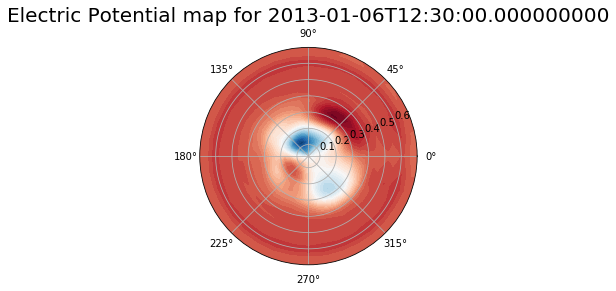

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_epot_map(fig, lats, lons, epot):
    ax = fig.add_subplot(111, projection='polar')
    r = np.radians(90.-lats)
    th = np.radians(lons)
    ax.contourf(th,r,epot,50,cmap='RdBu_r')
    return ax

epot = ds['epot'][0]
fig = plt.figure(figsize=(4, 4))
ax = plot_epot_map(fig, epot.lat, epot.lon, epot)
ax.set_title('Electric Potential map for %s' % epot.time.values, pad=15, size=20)
None

### Numpy compatability

Xarray has native support for quite a few Numpy compatable operations

Look [here](http://xarray.pydata.org/en/stable/user-guide/duckarrays.html) for a full list of support for Numpy

### Pandas compatability

While not necessarily easier, since AMGeO works with multi-dimensional data, Xarray provides compatability with pandas. A more comprehensive overview can be found [here](http://xarray.pydata.org/en/stable/user-guide/pandas.html)

In [26]:
# convert AMGeO Xarray DataSet to Pandas DataFrame
ds.to_dataframe()

E_ph      E_th  cond_hall  \
lat       lon   time                                                     
88.333323 0.0   2013-01-06 12:30:00  7.483382e-03  0.023218        4.0   
                2013-01-06 13:30:00  9.784051e-05  0.022406        4.0   
                2013-02-06 12:30:00 -6.474534e-04  0.016888        4.0   
                2013-02-06 13:30:00 -6.603464e-03  0.018608        4.0   
          10.0  2013-01-06 12:30:00  9.202928e-03  0.024022        4.0   
...                                           ...       ...        ...   
49.999754 350.0 2013-02-06 13:30:00  2.898804e-04 -0.000034        4.0   
          360.0 2013-01-06 12:30:00  7.414579e-06 -0.000357        4.0   
                2013-01-06 13:30:00  2.729920e-06 -0.000353        4.0   
                2013-02-06 12:30:00  2.163971e-06 -0.000304        4.0   
                2013-02-06 13:30:00  3.770982e-07 -0.000317        4.0   

                                     cond_ped         epot  int_joule_heat  \
lat       lon   time                                                         
88.333323 0.0   2013-01-06 12:30:00       4.0 -7466.953962        9.685306   
                2013-01-06 13:30:00       4.0 -9990.610811        7.433560   
                2013-02-06 12:30:00       4.0 -7358.956320        5.876442   
                2013-02-06 13:30:00       4.0 -8646.618328        6.996231   
          10.0  2013-01-06 12:30:00       4.0 -7786.521062        9.685306   
...                                       ...          ...             ...   
49.999754 350.0 2013-02-06 13:30:00       4.0   503.680961        6.996231   
          360.0 2013-01-06 12:30:00       4.0   406.612984        9.685306   
                2013-01-06 13:30:00       4.0   411.406157        7.433560   
                2013-02-06 12:30:00       4.0   343.183858        5.876442   
                2013-02-06 13:30:00       4.0   363.546270        6.996231   

                                     joule_heat        v_ph        v_th  
lat       lon   time                                                     
88.333323 0.0   2013-01-06 12:30:00    2.380289  395.064451 -127.333547  
                2013-01-06 13:30:00    2.008170  381.250971   -1.664806  
                2013-02-06 12:30:00    1.142518  287.360761   11.016747  
                2013-02-06 13:30:00    1.559388  316.617015  112.361294  
          10.0  2013-01-06 12:30:00    2.647090  408.754359 -156.592482  
...                                         ...         ...         ...  
49.999754 350.0 2013-02-06 13:30:00    0.000341   -0.692311   -5.935609  
          360.0 2013-01-06 12:30:00    0.000509   -7.300947   -0.151821  
                2013-01-06 13:30:00    0.000500   -7.236506   -0.055898  
                2013-02-06 12:30:00    0.000369   -6.221002   -0.044310  
                2013-02-06 13:30:00    0.000402   -6.492296   -0.007721  

[3552 rows x 9 columns]

# Conclusion

Thanks for checking out this notebook going over AMGeO's new API! 

Please get started with AMGeO [here](https://amgeo.colorado.edu/), we would love any feedback to continue improving our software.